<a href="https://colab.research.google.com/github/allergictocode/astronomy-calculator/blob/main/Model_struktur_interior_ZAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('gdrive/My Drive/Kuliah/Semester 5/AS3113_Fisika Bintang/Praktikum/statstar_fix.xlsx')
df

,r,Qm,L_r,T,P,rho,kap,eps,Column3,dlPdlT
0,1350000000,1.000000e+00,2.530000e+32,14000000,1.450000e+17,7.720000e+01,1.40,1.510000e+01,c,2.5
1,2060000000,9.990000e-01,2.830000e+32,13900000,1.430000e+17,7.660000e+01,1.42,1.460000e+01,c,2.5
2,2770000000,9.970000e-01,3.400000e+32,13800000,1.400000e+17,7.570000e+01,1.44,1.390000e+01,c,2.5
3,3480000000,9.930000e-01,4.280000e+32,13700000,1.360000e+17,7.450000e+01,1.46,1.310000e+01,c,2.5
4,4190000000,9.880000e-01,5.510000e+32,13500000,1.320000e+17,7.310000e+01,1.49,1.210000e+01,c,2.5
...,...,...,...,...,...,...,...,...,...,...
419,70800000000,1.180000e-11,3.290000e+33,13200,6.640000e+03,3.720000e-09,130.00,5.650000e-64,r,4.8
420,70800000000,3.400000e-12,3.290000e+33,9880,1.660000e+03,1.240000e-09,148.00,1.200000e-70,r,4.9
421,70900000000,6.080000e-13,3.290000e+33,6580,2.260000e+02,2.520000e-10,172.00,3.790000e-81,r,4.8
422,71000000000,3.940000e-14,3.290000e+33,3290,7.970000e+00,1.750000e-11,230.00,1.670000e-102,r,4.3


# Lembar kerja 1

Dengan menggunakan STATSTAR, buatlah model struktur interior ZAMS bintang bermassa 1,0 $M_⊙$, dengan input sebagai berikut:
- Massa bintang           = 1,0 $M_⊙$
- Luminositas bintang = 0,86071 $L_⊙$
- Temperatur efektif   = 5500,2 K
- Fraksi massa X           = 0,700
- Fraksi massa Y           = 0,292
- Fraksi massa Z           = 0,008

## Nomor 1

Gunakan hasil perhitungan STATSTAR di dekat permukaan bintang (lapisan i=1 hingga i=30). Hitung kedalaman optis (optical depth) dengan cara mengintegralkan persamaan
$dτ=-κρds$.
Petunjuk:
- gunakan $ds=dr$
- gunakan aturan trapesium untuk mengaproksimasi solusi integral tersebut

$$τ_{i+1}-τ_i=-(\frac{κ_iρ_i + κ_{i+1}ρ_{i+1}}{2})(r_{i+1}-r_i)$$

In [ ]:
# kedalaman optis (optical depth) di dekat permukaan bintang (lapisan i=1 hingga i=30)
# asumsikan kedalaman optis pada permukaan, tau = 2/3

kap = df['kap'].values
rho = df['rho'].values
r = df['r'].values
tau_reversed = [2/3]
for i in reversed(range(1, 424)):
  a = -((kap[i]*rho[i] + kap[i-1]*rho[i-1])/2) * (r[i-1]-r[i]) + tau_reversed[-1]
  tau_reversed.append(a)

tau = tau_reversed[::-1]
df['tau'] = tau

## Nomor 2

Untuk setiap nilai optical depth, gunakan persamaan berikut untuk menghitung temperatur bintang dengan asumsi atmosfer kelabu (gray atmosphere) yang plane-parallel dan dalam kondisi LTE.
$$T^4=\frac{3}{4}T_{ef}^4(τ+\frac{2}{3})$$
Cantumkan hasil perhitungan dalam bentuk tabel, bersama dengan data $r$, $ρ$, $κ$, dan $T$  dari STATSTAR dan hasil perhitungan $τ$ di soal nomor 1.


In [ ]:
T_ef = 5500.2 # temperatur efektif Matahari
T = df['T'].values
T_hitung = []
for i in range(424):
  b = (3/4 * T_ef**4 * (tau[i]+(2/3)))**(1/4)
  T_hitung.append(b)

df['T_perhitungan'] = T_hitung

In [ ]:
# untuk lapisan i=1 sampai i=30 (dekat permukaan bintang)
rdf = df[::-1]
rdf.loc[423:393]

,r,Qm,L_r,T,P,rho,kap,eps,Column3,dlPdlT,tau,T_perhitungan
423,71100000000,0.000000e+00,3.290000e+33,0,0.00,0.000000e+00,0.0,0.000000e+00,r,4.3,0.666667,5500.200000
422,71000000000,3.940000e-14,3.290000e+33,3290,7.97,1.750000e-11,230.0,1.670000e-102,r,4.3,0.867917,5696.937001
421,70900000000,6.080000e-13,3.290000e+33,6580,226.00,2.520000e-10,172.0,3.790000e-81,r,4.8,3.236367,7194.396393
420,70800000000,3.400000e-12,3.290000e+33,9880,1660.00,1.240000e-09,148.0,1.200000e-70,r,4.9,14.579567,10114.267559
419,70800000000,1.180000e-11,3.290000e+33,13200,6640.00,3.720000e-09,130.0,5.650000e-64,r,4.8,14.579567,10114.267559
418,70700000000,3.110000e-11,3.290000e+33,16500,19200.00,8.610000e-09,117.0,3.360000e-59,r,4.7,89.128067,15756.382453
417,70600000000,6.920000e-11,3.290000e+33,19800,45500.00,1.700000e-08,106.0,1.540000e-55,r,4.7,229.596567,19938.842704
416,70600000000,1.370000e-10,3.290000e+33,23100,94100.00,3.020000e-08,97.5,1.340000e-52,r,4.7,229.596567,19938.842704
415,70500000000,2.470000e-10,3.290000e+33,26500,176000.00,4.940000e-08,90.6,3.640000e-50,r,4.7,600.603567,25346.104646
414,70400000000,4.170000e-10,3.290000e+33,29800,307000.00,7.640000e-08,84.8,4.250000e-48,r,4.7,1148.321567,29800.441128


Buat grafik antara temperatur hasil perhitungan STATSTAR (sumbu y) terhadap optical depth (sumbu x) dan temperatur hasil perhitungan (sumbu y) terhadap optical depth (sumbu x).
Plot keduanya dalam grafik yang sama.

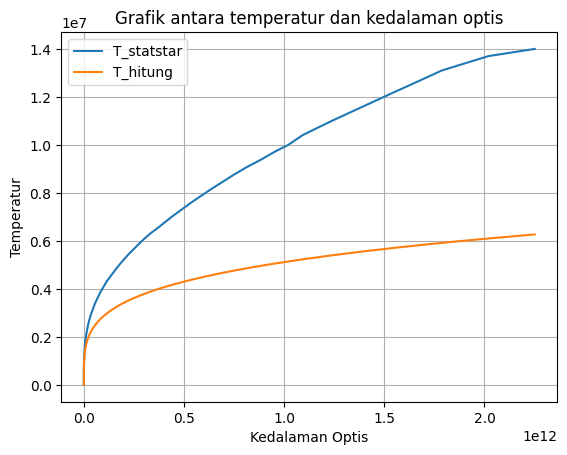

In [ ]:
# plot T_statstar vs tau
plt.plot(tau, T, label='T_statstar')
# plot T_hitung vs tau
plt.plot(tau, T_hitung, label='T_hitung')
plt.title('Grafik antara temperatur dan kedalaman optis')
plt.xlabel('Kedalaman Optis')
plt.ylabel('Temperatur')
plt.legend()
plt.grid()
plt.show()

# Lembar Kerja 2

Dengan menggunakan STATSTAR, buatlah model struktur interior ZAMS bintang bermassa 1,0 $M_⊙$, dengan input sebagai berikut:
- Massa bintang           = 1,0 $M_⊙$
- Luminositas bintang = 0,86071 $L_⊙$
- Temperatur efektif   = 5500,2 K
- Fraksi massa X           = 0,700
- Fraksi massa Y           = 0,292
- Fraksi massa Z           = 0,008

## Nomor 1

Buatlah plot di python:
1. $P$ terhadap $r$, $M_r$ terhadap $r$, $L_r$ terhadap $r$, dan $T$ terhadap $r$ (dalam 1 grafik).
2. Tentukan **radius inti Matahari** dan **massa inti Matahari** dari grafik tersebut.


In [ ]:
# Plot P  terhadap  r ,  Mr  terhadap  r ,  Lr  terhadap  r , dan  T  terhadap  r  (dalam 1 grafik)

Mtot =  1.989000E+33 # gram
Qm = df['Qm'].values
Mr = []
for i in range(424):
  m = (1-Qm[i])*Mtot
  Mr.append(m)

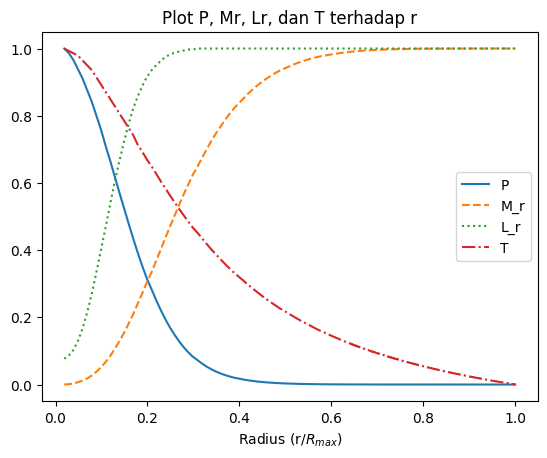

In [ ]:
# Plot P  terhadap  r ,  Mr  terhadap  r ,  Lr  terhadap  r , dan  T  terhadap  r  (dalam 1 grafik)

P = df['P'].values
Lr = df['L_r'].values
P_max = P/np.max(P)
Mr_max = Mr/np.max(Mr)
Lr_max = Lr/np.max(Lr)
T_max = T/np.max(T)
r_max = r/np.max(r)
plt.plot(r_max, P_max, label='P', linestyle='-')
plt.plot(r_max, Mr_max, label='M_r', linestyle='--')
plt.plot(r_max, Lr_max, label='L_r', linestyle=':')
plt.plot(r_max, T_max, label='T', linestyle='-.')
plt.legend()
plt.xlabel('Radius (r/$R_{max}$)')
plt.title('Plot P, Mr, Lr, dan T terhadap r')
plt.show()